In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
transactions_by_customer = pd.read_csv('transactions_by_customer_DW.csv')

# 1. Univariate Analysis

Below, we create count plots of all the discrete variables. This inclused age range, family size, marital status, rented, income bracket, brand type, category, day, month, year, week, weekday

In [3]:
transactions_by_customer['redemption_status'] = 0
transactions_by_customer['redemption_status'][transactions_by_customer['coupon_discount']!=0] = 1
transactions_by_customer.columns

Index(['customer_id', 'item_id', 'date', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount', 'age_range', 'marital_status',
       'rented', 'family_size', 'no_of_children', 'income_bracket', 'brand',
       'brand_type', 'category', 'day', 'month', 'year', 'week', 'weekday',
       'redemption_status'],
      dtype='object')

## Discrete Variables

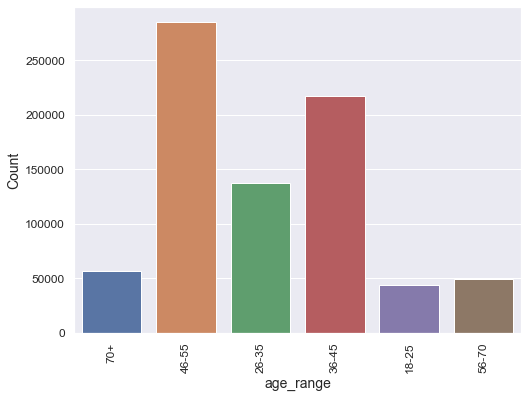

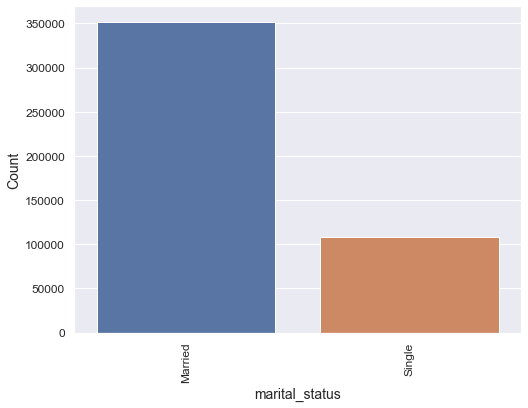

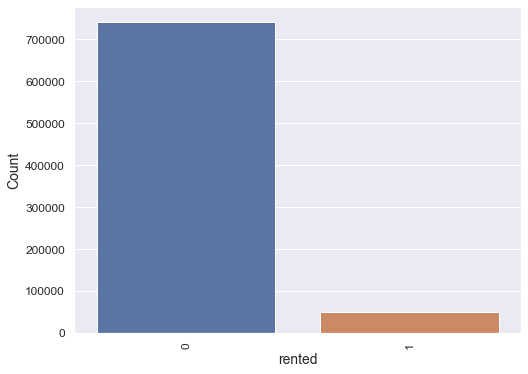

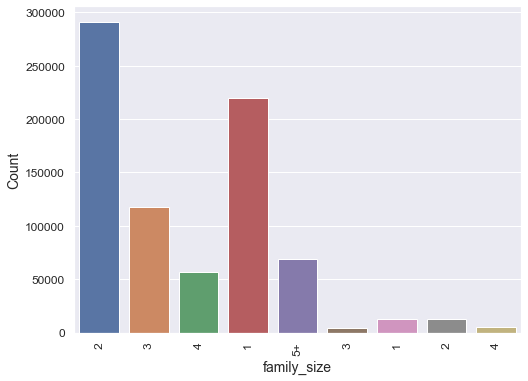

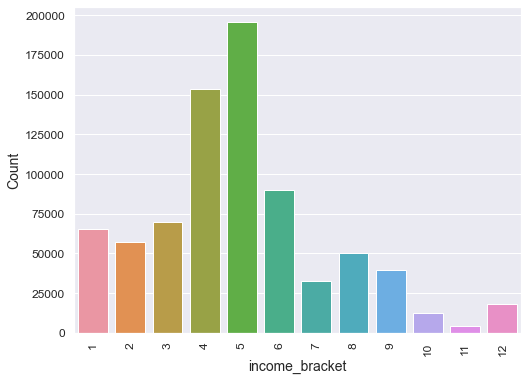

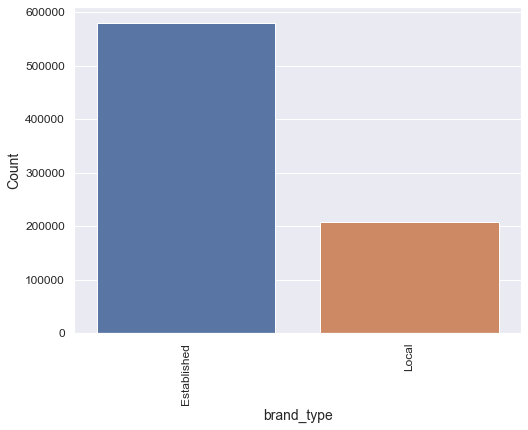

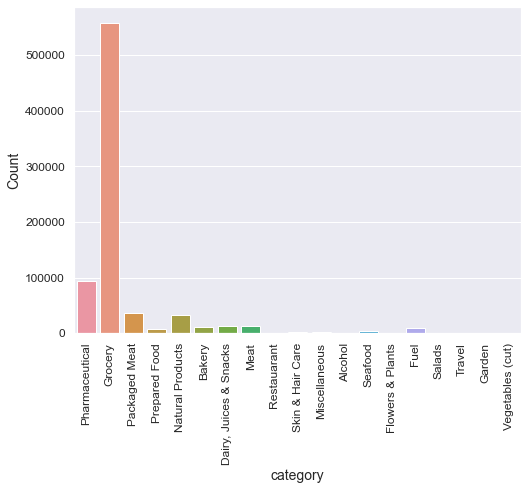

In [4]:
discrete_variables = ['age_range', 'marital_status', 'rented', 'family_size', 'income_bracket', 'brand_type', 'category']

sns.set(rc={'figure.figsize':(8,6)})
for var in discrete_variables:
    sns.countplot(transactions_by_customer[var])
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()

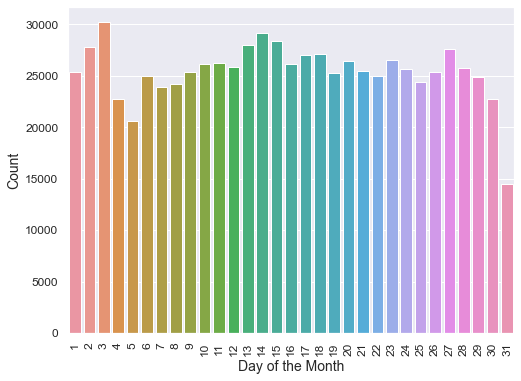

In [5]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(transactions_by_customer['day'])
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

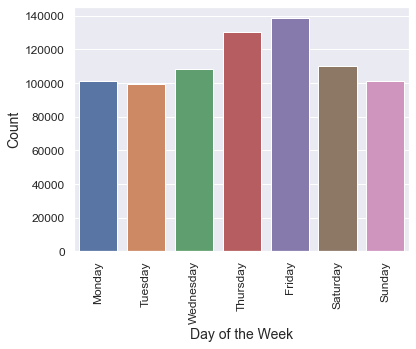

In [6]:
sns.set(rc={'figure.figsize':(6,4.5)})
sns.countplot(transactions_by_customer['weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

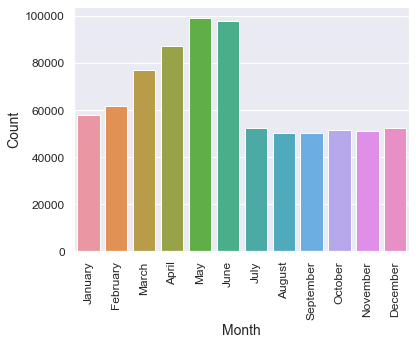

In [7]:
sns.countplot(transactions_by_customer['month'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

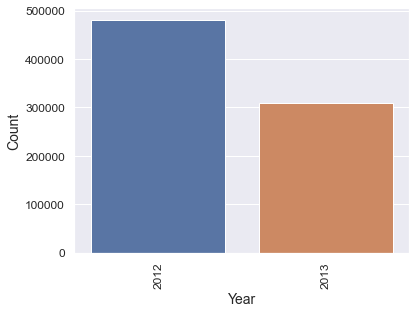

In [8]:
sns.countplot(transactions_by_customer['year'])
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

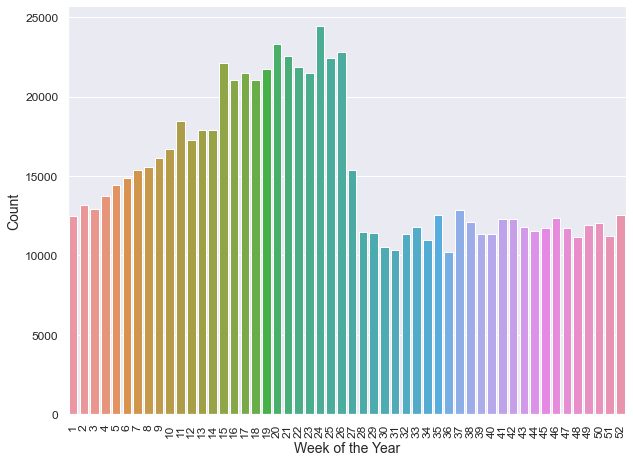

In [9]:
sns.set(rc={'figure.figsize':(10,7.5)})
sns.countplot(transactions_by_customer['week'])
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Week of the Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## Continuous Variables

### Selling Price

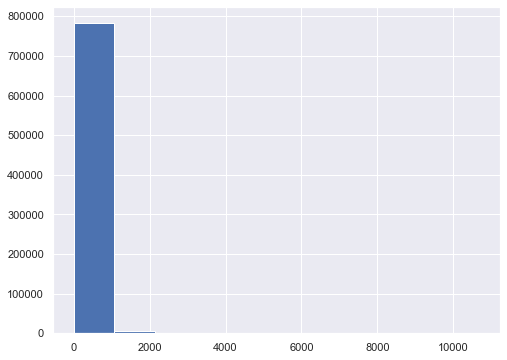

In [10]:
sns.set(rc={'figure.figsize':(8,6)})
transactions_by_customer['selling_price'].hist()

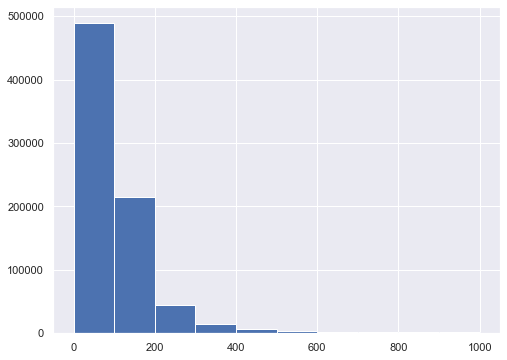

In [11]:
transactions_by_customer['selling_price'][transactions_by_customer['selling_price'] <1000].hist()

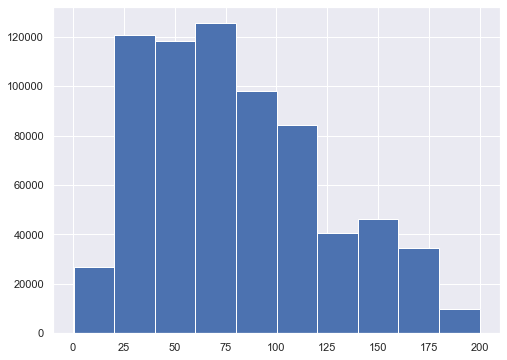

In [12]:
transactions_by_customer['selling_price'][transactions_by_customer['selling_price'] <200].hist()

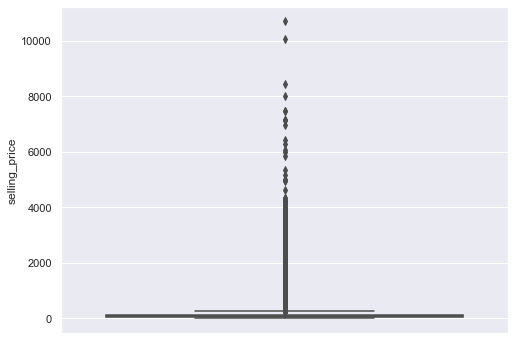

In [13]:
sns.boxplot(data=transactions_by_customer, y='selling_price', hue='redemption_status')

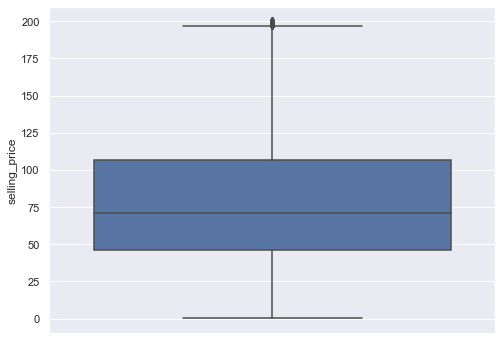

In [14]:
sns.boxplot(data=transactions_by_customer[transactions_by_customer['selling_price']<200], y='selling_price', hue='redemption_status')

### Coupon Discount

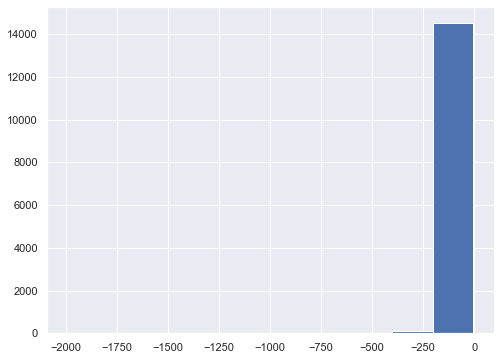

In [15]:
transactions_by_customer['coupon_discount'][transactions_by_customer['coupon_discount'] != 0].hist()

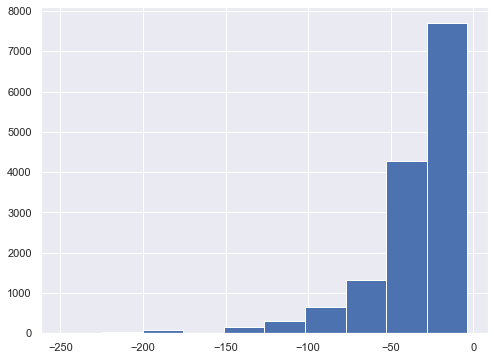

In [16]:
transactions_by_customer['coupon_discount'][(transactions_by_customer['coupon_discount']!=0) & (transactions_by_customer['coupon_discount']>-250)].hist()

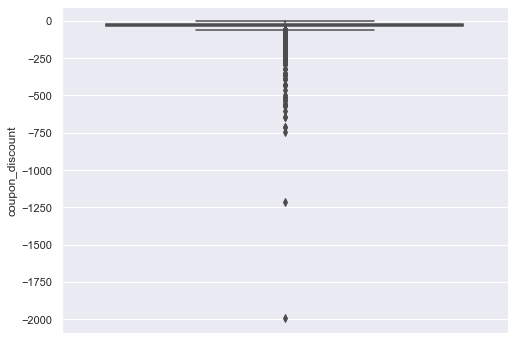

In [17]:
sns.boxplot(data=transactions_by_customer[transactions_by_customer['coupon_discount']!=0], y='coupon_discount', hue='redemption_status')

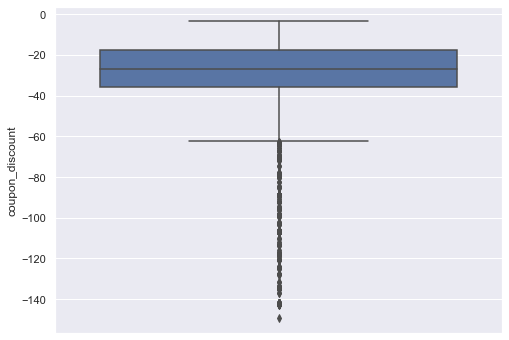

In [18]:
sns.boxplot(data=transactions_by_customer[(transactions_by_customer['coupon_discount']!=0) & (transactions_by_customer['coupon_discount']>=-150)], y='coupon_discount', hue='redemption_status')

### Other Discount

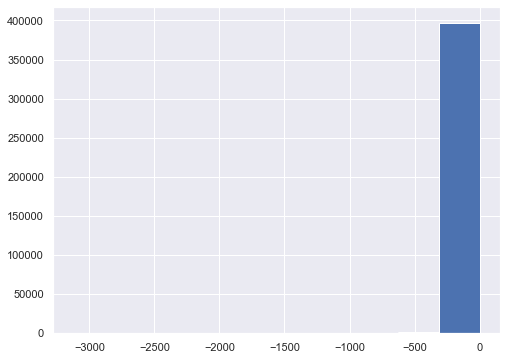

In [19]:
transactions_by_customer['other_discount'][transactions_by_customer['other_discount'] != 0].hist()

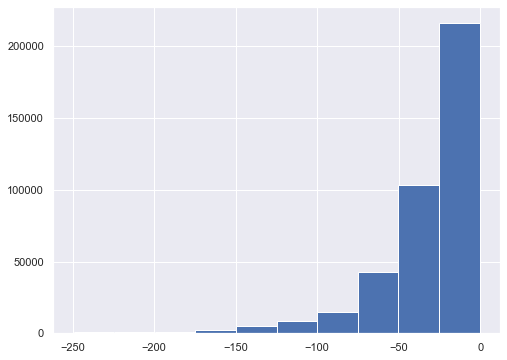

In [20]:
transactions_by_customer['other_discount'][(transactions_by_customer['other_discount']!=0) & (transactions_by_customer['other_discount']>-250)].hist()

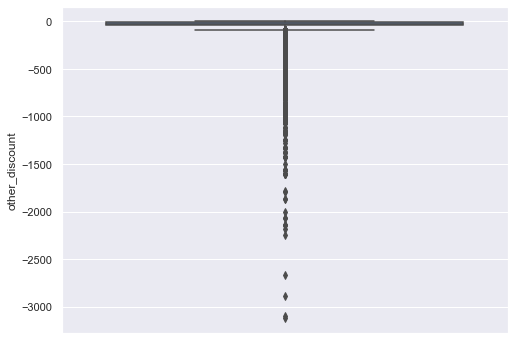

In [21]:
sns.boxplot(data=transactions_by_customer[transactions_by_customer['other_discount']!=0], y='other_discount', hue='redemption_status')

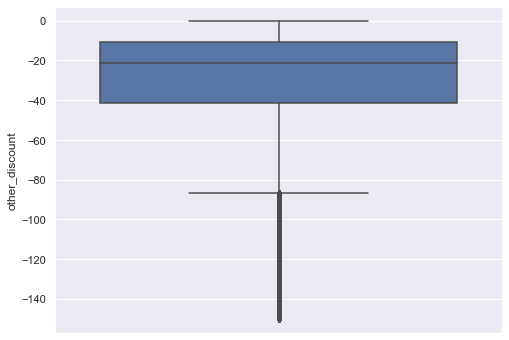

In [22]:
sns.boxplot(data=transactions_by_customer[(transactions_by_customer['other_discount']!=0) & (transactions_by_customer['other_discount']>=-150)], y='other_discount', hue='redemption_status')

# 2. Bivariate Analysis

## Correlation Matrix

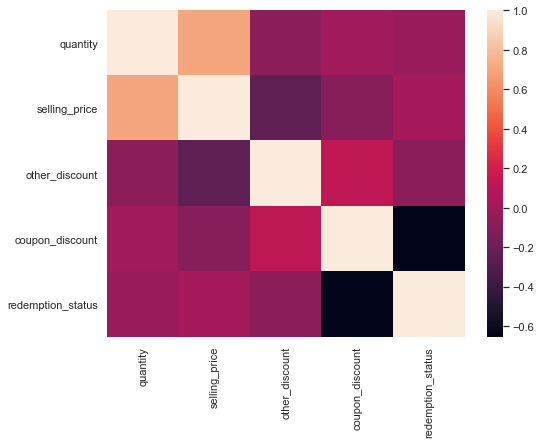

In [23]:
categories = transactions_by_customer.columns.tolist()
categories.remove('quantity')
categories.remove('selling_price')
categories.remove('other_discount')
categories.remove('coupon_discount')
categories.remove('redemption_status')


for col in categories:
    transactions_by_customer[col] = transactions_by_customer[col].astype('category')

corr_matrix = transactions_by_customer.corr()
sns.heatmap(corr_matrix)

## Pair Plot

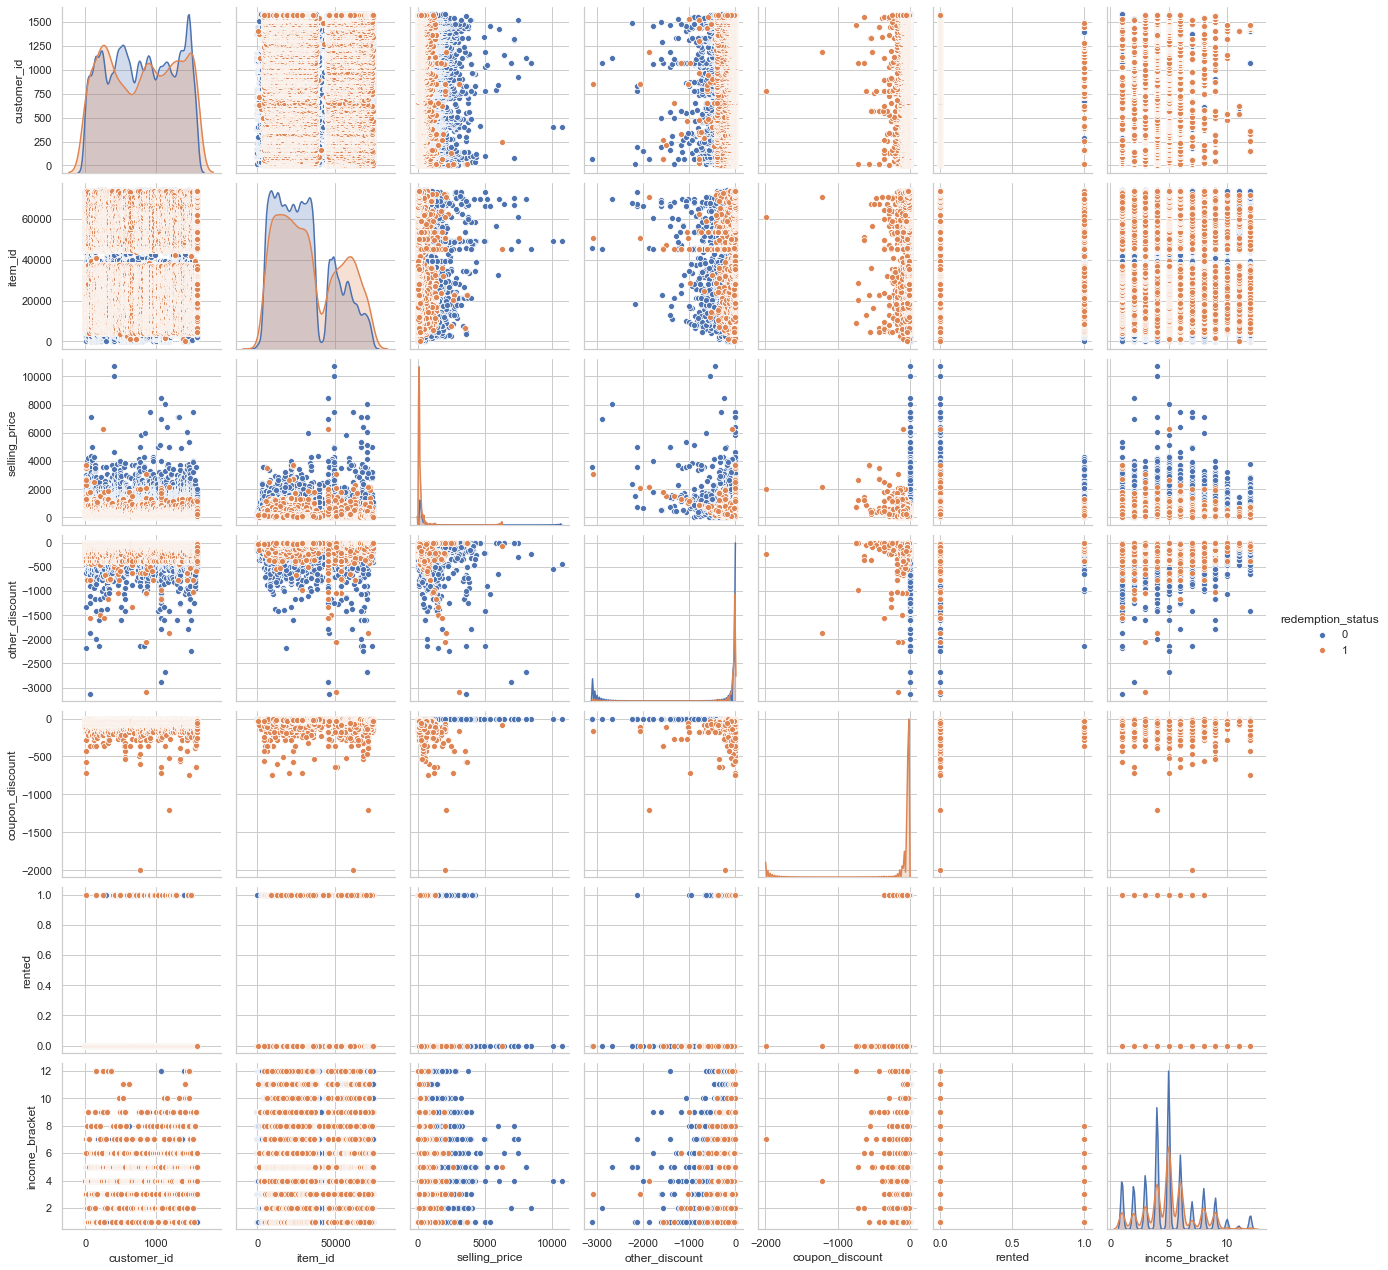

In [24]:
transactions_pp = transactions_by_customer.drop(['date', 'brand', 'quantity', 'no_of_children', 'marital_status', 'year', 'day', 'week'], axis=1)

sns.set_style('whitegrid')
sns.pairplot(transactions_pp, hue = 'redemption_status', height=2.5)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

## Numerical vs. Numerical variables

### Selling Price vs. Coupon Discount

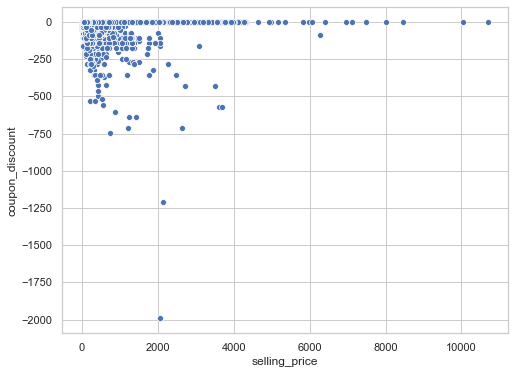

In [25]:
sns.scatterplot(data=transactions_by_customer, x='selling_price', y='coupon_discount')
plt.show()

### Selling Price vs. Other Discount

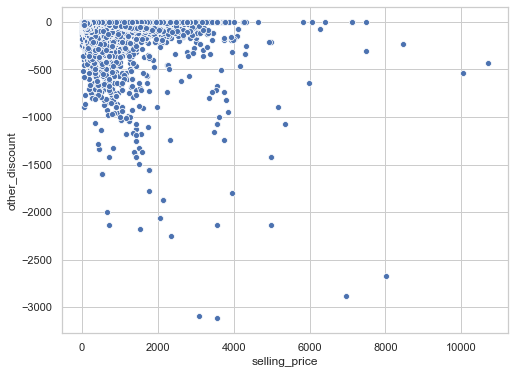

In [26]:
sns.scatterplot(data=transactions_by_customer, x='selling_price', y='other_discount')
plt.show()

### Coupon Discount vs. Other Discount

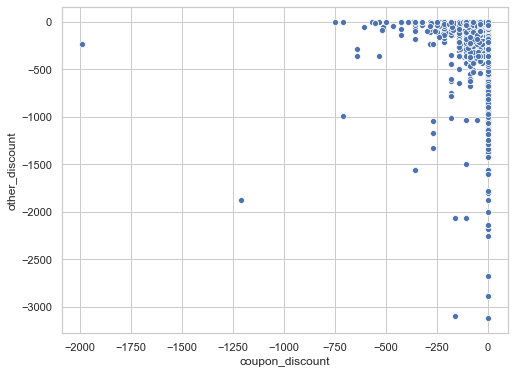

In [27]:
sns.scatterplot(data=transactions_by_customer, x='coupon_discount', y='other_discount')
plt.show()

## Numerical vs. Categorical variables


### Selling Price vs. Non-Datetime Categorical Vairables

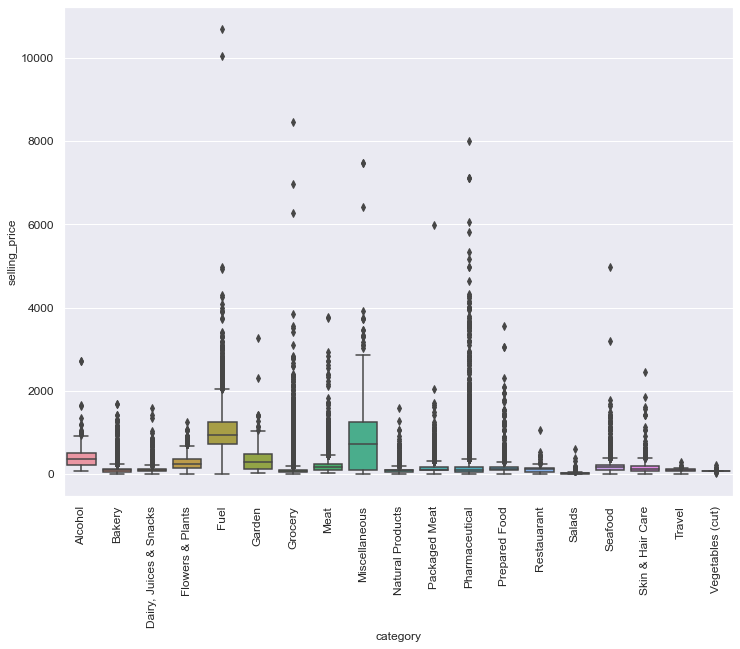

In [28]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(data=transactions_by_customer, x='category', y='selling_price')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

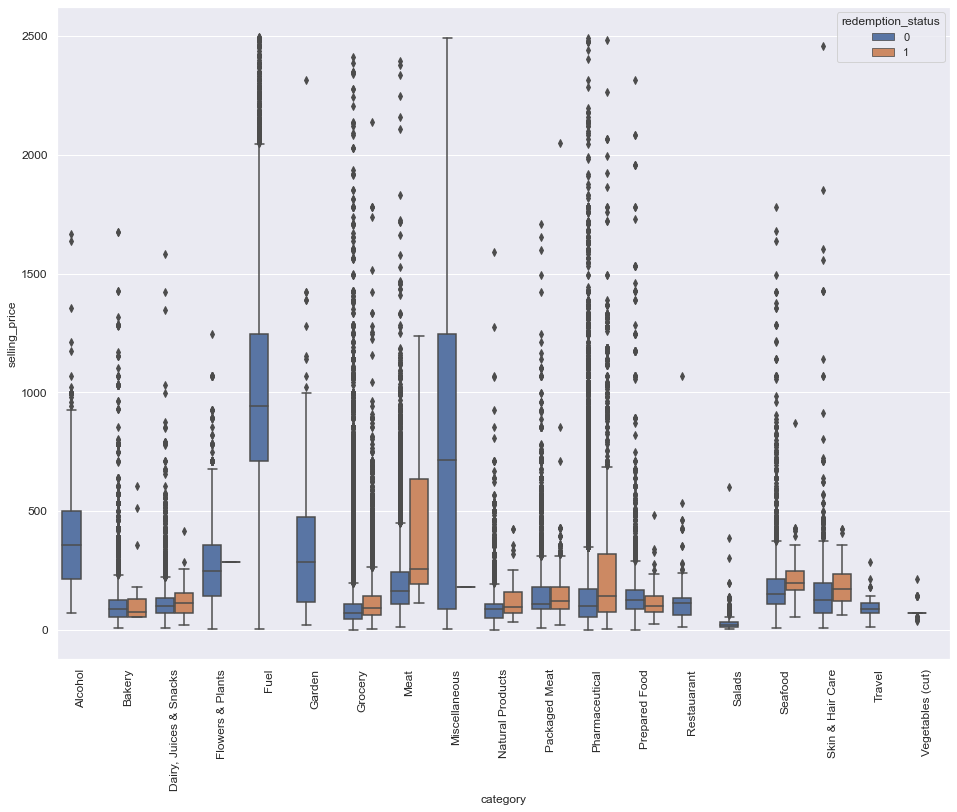

In [29]:
sns.set(rc={'figure.figsize':(16,12)})
sns.boxplot(data=transactions_by_customer[transactions_by_customer['selling_price']<2500], x='category', y='selling_price', hue='redemption_status')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

### Selling Price vs. Week of Year

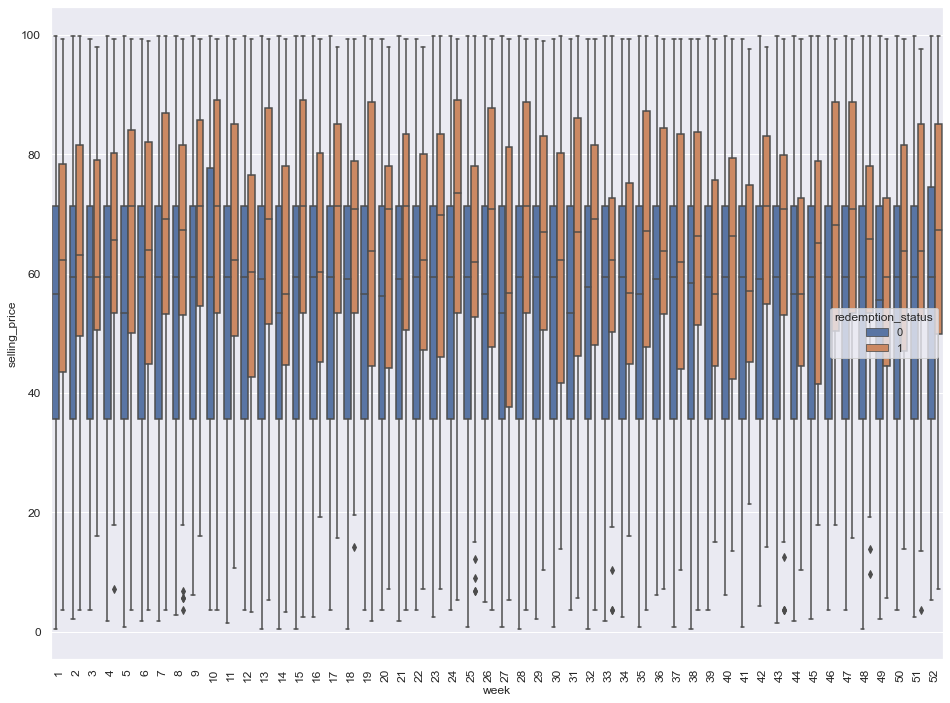

In [30]:
sns.set(rc={'figure.figsize':(16,12)})
sns.boxplot(data=transactions_by_customer[transactions_by_customer['selling_price']<100], x='week', y='selling_price', hue='redemption_status')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

## Features vs. Predictor Variable (Redemption Status)

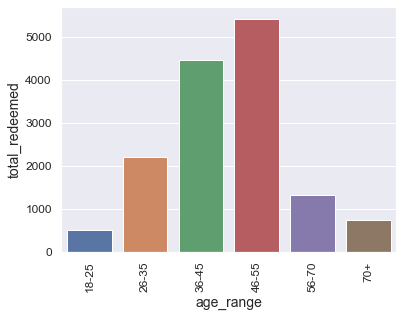

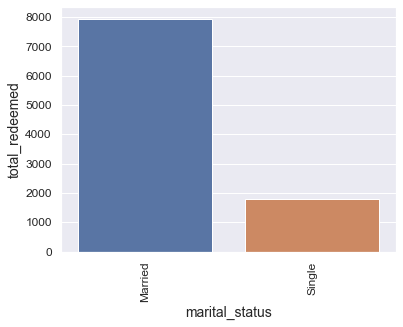

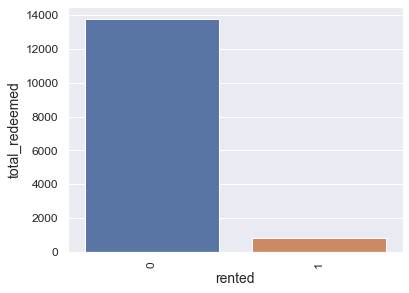

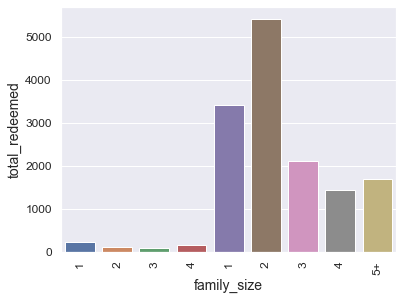

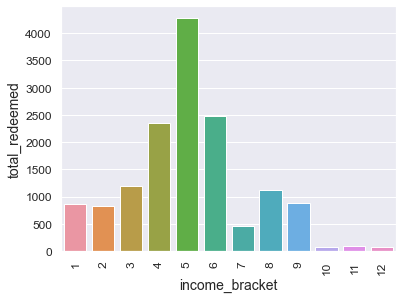

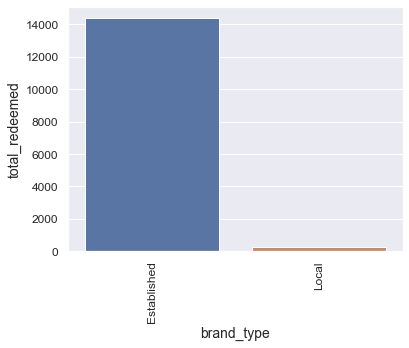

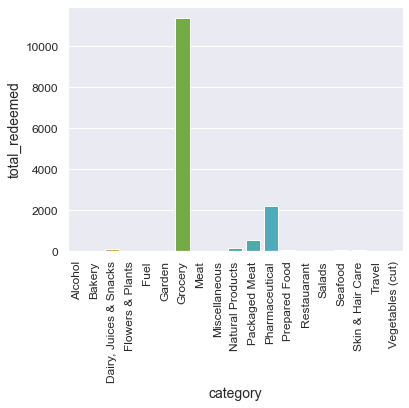

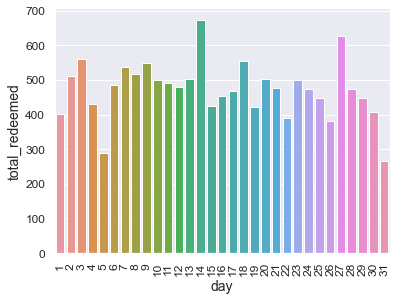

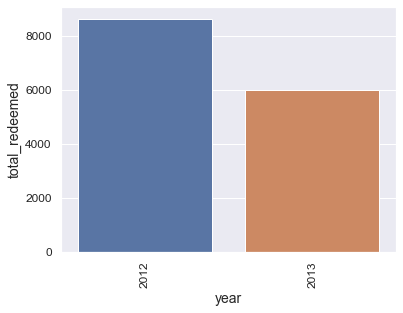

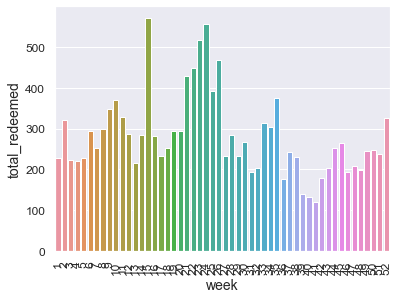

In [31]:
features = ['age_range', 'marital_status', 'rented', 'family_size', 'income_bracket','brand_type', 'category', 'day', 'year', 'week']
sns.set(rc={'figure.figsize':(6, 4.5)})

for feature in features:
    transactions_by_feature = transactions_by_customer.groupby(feature).sum().reset_index()
    sns.barplot(data=transactions_by_feature, x=feature, y='redemption_status')
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('total_redeemed', fontsize=14)
    plt.show()

### Weekday vs. Redemption Status

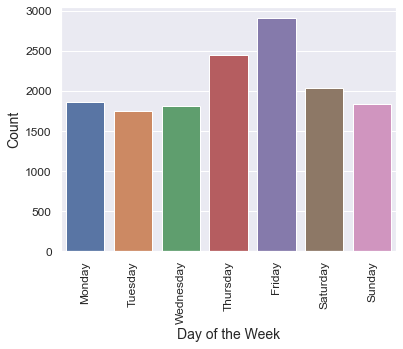

In [32]:
transactions_by_feature = transactions_by_customer.groupby('weekday').sum().reset_index()
sns.barplot(data=transactions_by_feature, y='redemption_status', x='weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

### Month vs. Redemption Status

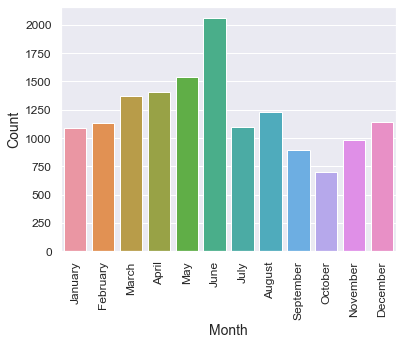

In [33]:
transactions_by_feature = transactions_by_customer.groupby('month').sum().reset_index()
sns.barplot(data=transactions_by_feature, y='redemption_status', x='month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()